In [ ]:
## Utility Function v(x)
## Page 8(2)
## No exact value of lambda (coefficient of loss aversion) is provided but
## it is normally assumed to be between 2 and 2.5.
def utility_function(x, alpha, beta, lambd):
    if x >= 0:
        return x**alpha
    else:
        return -lambd * ((-x)**beta)

In [ ]:
## Weighting function
## Page 9 (4)
## Following the paper's recommendation that gamma = 0.61 or 0.69 in the case
## of gains or losses respectively
def w(x, p):
  if x>=0:
    return (p**0.61) / ((p**0.61 + (1 - p)**0.61)**(1/0.61))
  else:
    return (p**0.69) / ((p**0.69 + (1 - p)**0.69)**(1/0.69))

In [ ]:
## This function takes in a list of ranked returns (my_list) and returning
## pi value utilizing the weighting function defined above
## returns a list containing decision weight attached to x_i (need to sort in
## ascending order first)
import numpy as np

def compute_pi(my_list):
    n = len(my_list)

    results = []
    for i, value in enumerate(my_list):
        P_i = 1-((i - 1) / n)
        P_i_star = 1- (i / n)

        # Compute pi and pi_star using the weighting function
        pi_value = w(my_list[i], P_i)
        pi_star_value = w(my_list[i],P_i_star)

        results.append(pi_value-pi_star_value)

    return results

In [ ]:
### This function is the actual value we need to put on the y-axis
## Page 8(3)
def prospect_utility(my_list,pi_list,alpha,beta,lambd):
  v_g = 0
  for i in range(len(my_list)):
    my_val = pi_list[i] * utility_function(my_list[i],alpha,beta,lambd)
    v_g += my_val
  return v_g


In [ ]:
import pandas as pd

def compute_segmented_n_monthly_returns(df, column_name='Monthly Returns', n=2):
    df[column_name] = df[column_name].astype(float)

    # Initialize a list to store the compound returns for each segment
    compound_returns = []

    # Iterate through the DataFrame in chunks of n months
    for i in range(0, len(df), n):
        # Select the chunk
        chunk = df[column_name].iloc[i:i+n]

        # Calculate the compound return for the chunk
        compounded = (1 + chunk).prod() - 1

        # Append the result to the list
        compound_returns.append(compounded)

    # Create a DataFrame from the list of compound returns
    compound_returns_df = pd.DataFrame(compound_returns, columns=['Monthly Compound Returns'])

    return compound_returns_df

In [ ]:
## Bootstrap
def sample_with_replacement(my_df, sample_n=1000):
    sample_list = my_df['Monthly Compound Returns'].sample(n=sample_n, replace=True).tolist()
    return sample_list

In [ ]:
## We don't need to use it anymore since we have change the dataset
def add_monthly_ytm_column(df, new_column_name='Monthly_YTM'):
    # Define the conversion function inside
    def annual_ytm_to_monthly_yield(annual_ytm):
        return (1 + annual_ytm) ** (1/12) - 1

    # Apply the conversion and create the new column
    df[new_column_name] = df['YLDMAT'].apply(annual_ytm_to_monthly_yield)

In [ ]:
bond_df = pd.read_csv('/content/5_year_bond.csv')

In [ ]:
# add_monthly_ytm_column(bond_df)

In [ ]:
n_value = [1,2,3,4,6,8,10,12,14,16,18]
utility_list_bond = []
for val in n_value:
  my_df = compute_segmented_n_monthly_returns(bond_df, column_name='b5ret', n=val)
  column_list_bond = sample_with_replacement(my_df,sample_n=10000)
  column_list_bond = sorted(column_list_bond)
  pi_bond = compute_pi(column_list_bond)
  utility_list_bond.append(prospect_utility(column_list_bond,pi_bond,0.88,0.88,2.25))

The part below is testing on a small dataset on stock (5 years of data)

In [ ]:
return_df = pd.read_csv('/content/5_year_return.csv')

In [ ]:
monthly_returns_df = return_df[['vwretd']].rename(columns={'vwretd': 'Monthly Returns'})

In [ ]:
n_value = [1,2,3,4,6,8,10,12,14,16,18]
utility_list = []
for val in n_value:
  my_df = compute_segmented_n_monthly_returns(monthly_returns_df, column_name='Monthly Returns', n=val)
  column_list = sample_with_replacement(my_df,sample_n=10000)
  column_list = sorted(column_list)
  pi = compute_pi(column_list)
  utility_list.append(prospect_utility(column_list,pi,0.88,0.88,2.25))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


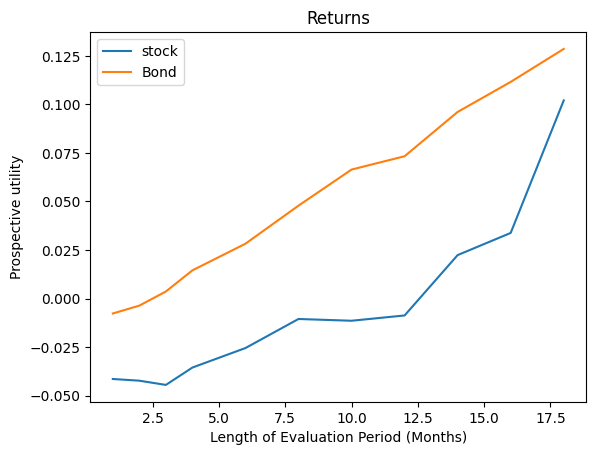

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_value, utility_list,label='stock')  # Plot the line graph
plt.plot(n_value, utility_list_bond, label='Bond')
plt.xlabel('Length of Evaluation Period (Months)')    # Label for the X-axis
plt.ylabel('Prospective utility')    # Label for the Y-axis
plt.title('Returns')  # Title of the graph
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


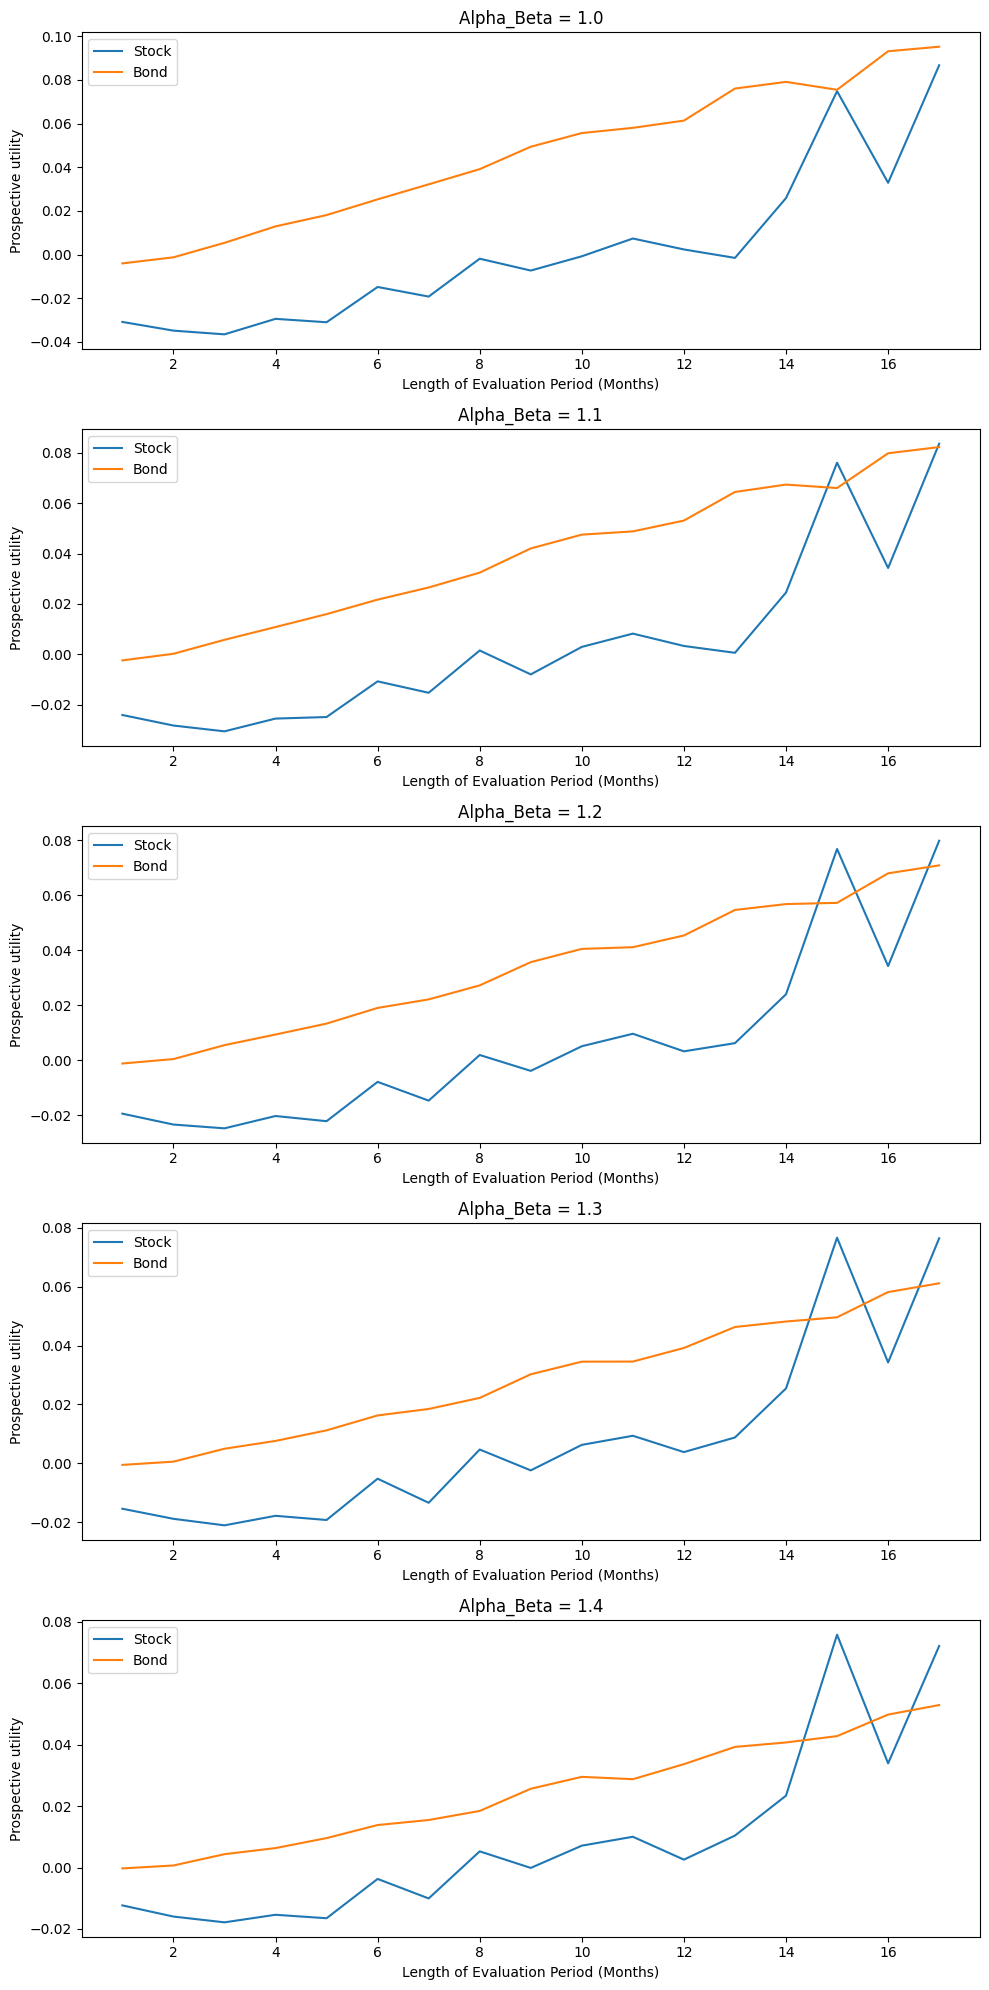

In [ ]:
#sensitive analysis - alpha,beta (0.88 estimated in paper)
#currently, we will temporarily set beta/alpha to be five since that will produce some sort of intersection
import numpy as np
import matplotlib.pyplot as plt

alpha_beta_list = np.arange(1, 1.5, 0.1)
n_value = np.arange(1, 18, 1)
fig, axs = plt.subplots(len(alpha_beta_list), 1, figsize=(10, 20))  # Adjust the size as needed

for idx, alpha_beta_i in enumerate(alpha_beta_list):
    utility_list_bond = []
    utility_list = []
    for val in n_value:
        # Assuming 'compute_segmented_n_monthly_returns', 'sample_with_replacement', 'compute_pi',
        # and 'prospect_utility' are defined elsewhere in your code.
        my_df_bond = compute_segmented_n_monthly_returns(bond_df, column_name='b5ret', n=val)
        column_list_bond = sample_with_replacement(my_df_bond, sample_n=100000)
        column_list_bond = sorted(column_list_bond)
        pi_bond = compute_pi(column_list_bond)
        utility_list_bond.append(prospect_utility(column_list_bond, pi_bond, alpha_beta_i, alpha_beta_i, 2.25))

        my_df_stock = compute_segmented_n_monthly_returns(monthly_returns_df, column_name='Monthly Returns', n=val)
        column_list_stock = sample_with_replacement(my_df_stock, sample_n=100000)
        column_list_stock = sorted(column_list_stock)
        pi_stock = compute_pi(column_list_stock)
        utility_list.append(prospect_utility(column_list_stock, pi_stock, alpha_beta_i, alpha_beta_i, 2.25))

    axs[idx].plot(n_value, utility_list, label='Stock')
    axs[idx].plot(n_value, utility_list_bond, label='Bond')
    axs[idx].set_title(f'Alpha_Beta = {alpha_beta_i:.1f}')
    axs[idx].set_xlabel('Length of Evaluation Period (Months)')
    axs[idx].set_ylabel('Prospective utility')
    axs[idx].legend()

plt.tight_layout()
plt.show()

Currently we are using the us treasury 5 year bond and S&P 500 monthly data from 1980-2019

In [ ]:
### Don't run it, changing lambda value doesn't produce significant change to the result
import numpy as np
import matplotlib.pyplot as plt

# Assuming definitions of compute_segmented_n_monthly_returns, sample_with_replacement, compute_pi, and prospect_utility exist

lambd_list = np.arange(3, 7, 1)
n_value = np.arange(1, 18, 1)

# Setting up the figure for subplots
fig, axs = plt.subplots(len(lambd_list), 1, figsize=(10, 40))  # Adjust the figsize as needed

for idx, lambdi in enumerate(lambd_list):
    utility_list_bond = []
    utility_list_stock = []
    for val in n_value:
        # For bonds
        my_df_bond = compute_segmented_n_monthly_returns(bond_df, 'Monthly_YTM', val)
        column_list_bond = sample_with_replacement(my_df_bond, sample_n=10000)
        pi_bond = compute_pi(column_list_bond)
        utility_list_bond.append(prospect_utility(column_list_bond, pi_bond, 5, 5, lambdi))

        # For stocks
        my_df_stock = compute_segmented_n_monthly_returns(monthly_returns_df, 'Monthly Returns', val)
        column_list_stock = sample_with_replacement(my_df_stock, sample_n=10000)
        pi_stock = compute_pi(column_list_stock)
        utility_list_stock.append(prospect_utility(column_list_stock, pi_stock, 5, 5, lambdi))

    # Plotting on the respective subplot
    axs[idx].plot(n_value, utility_list_stock, label='Stock')
    axs[idx].plot(n_value, utility_list_bond, label='Bond')
    axs[idx].set_title(f'Lambda = {lambdi}')
    axs[idx].set_xlabel('Length of Evaluation Period (Months)')
    axs[idx].set_ylabel('Prospective Utility')
    axs[idx].legend()

plt.tight_layout()
plt.show()

Investigating the datasets themselves

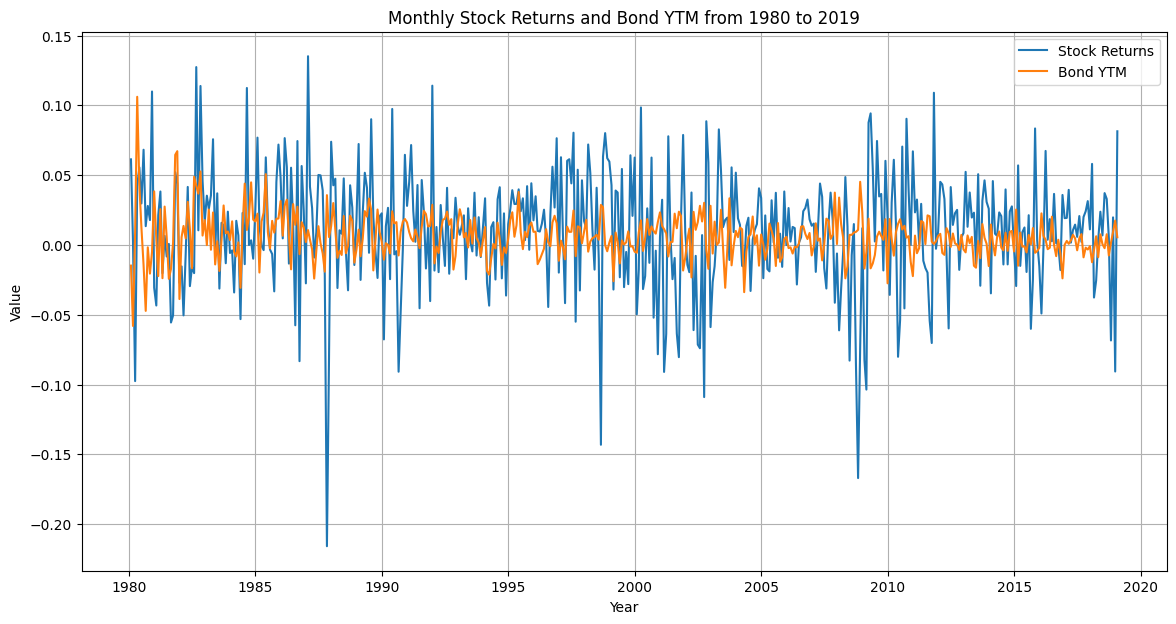

In [ ]:

monthly_returns_df.index = pd.date_range(start='1980-01', end='2019-02', freq='M')

bond_df.index = pd.date_range(start='1980-01', end='2019-02', freq='M')

plt.figure(figsize=(14, 7))  # Set the figure size for better readability

plt.plot(monthly_returns_df['Monthly Returns'], label='Stock Returns')  # Replace 'Returns' with the actual column name

plt.plot(bond_df['b5ret'], label='Bond YTM')  # Replace 'Monthly_YTM' with the actual column name

plt.title('Monthly Stock Returns and Bond YTM from 1980 to 2019')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()  # Show legend to differentiate between the lines
plt.grid(True)  # Add grid for better readability
plt.show()

**Now, what is the optimal mix of stock and bond that produces the maxinum prospective utility**


In [ ]:
bond_df_14 = compute_segmented_n_monthly_returns(bond_df, column_name='b5ret', n=14)

In [ ]:
stock_df_14 = compute_segmented_n_monthly_returns(monthly_returns_df, column_name='Monthly Returns', n=14)

In [ ]:
weighted_return = pd.DataFrame()

# Define the weight pairs you want to use, e.g., (10%, 90%), (20%, 80%), ..., (90%, 10%)
weight_pairs = [(x, 100-x) for x in range(0, 105, 5)]

# Loop over the weight pairs and compute the weighted sum for each
for weights in weight_pairs:
    weight1, weight2 = weights[0] / 100.0, weights[1] / 100.0
    weighted_column_name = f'{weight1*100}%_bond_{weight2*100}%_stock'
    weighted_return[weighted_column_name] = bond_df_14['Monthly Compound Returns'] * weight1 + stock_df_14['Monthly Compound Returns'] * weight2

# Display the new DataFrame with weighted returns
print(weighted_return.head())

   0.0%_bond_100.0%_stock  5.0%_bond_95.0%_stock  10.0%_bond_90.0%_stock  \
0                0.295372               0.281560                0.267747   
1               -0.058169              -0.047987               -0.037805   
2                0.540183               0.525987                0.511792   
3                0.049974               0.051371                0.052768   
4                0.196774               0.200521                0.204269   

   15.0%_bond_85.0%_stock  20.0%_bond_80.0%_stock  25.0%_bond_75.0%_stock  \
0                0.253934                0.240121                0.226308   
1               -0.027623               -0.017441               -0.007258   
2                0.497596                0.483401                0.469205   
3                0.054165                0.055561                0.056958   
4                0.208017                0.211765                0.215512   

   30.0%_bond_70.0%_stock  35.0%_bond_65.0%_stock  40.0%_bond_60.0%_stock  \
0  

In [ ]:
utility_list_op = []
percentage_list = [i / 100 for i in range(0, 105, 5)]
for column_name, column_data in weighted_return.items():
    # Perform some operation on each column. Here, as an example, we calculate and print the mean.
    column_sorted = sorted(column_data)
    pi = compute_pi(column_sorted)
    utility_list_op.append(prospect_utility(column_sorted,pi,1.2,1.2,2.25))

In [ ]:
percentage_list

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

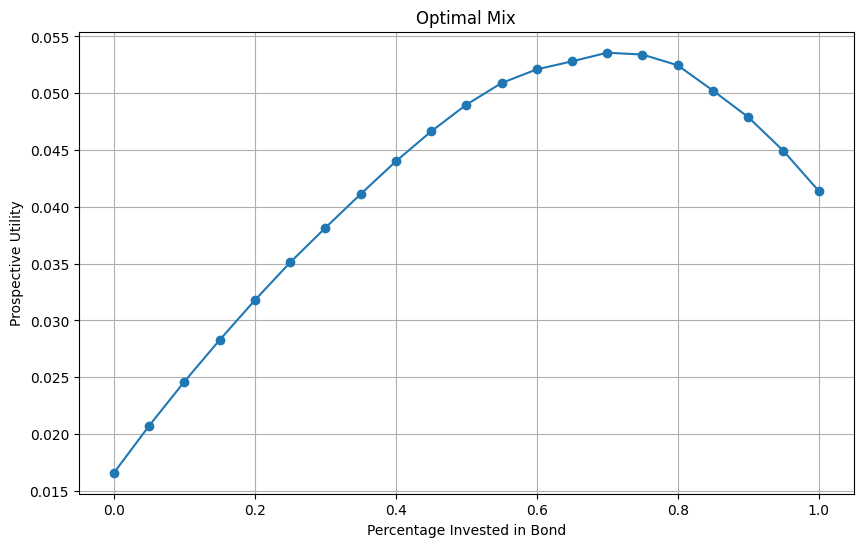

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: specify figure size
plt.plot(percentage_list, utility_list_op, marker='o')  # Plot the data

# Add labels and title
plt.xlabel('Percentage Invested in Bond')
plt.ylabel('Prospective Utility')
plt.title('Optimal Mix')

# Show grid (optional)
plt.grid(True)

# Display the plot
plt.show()